# Analysis of bookshop sales

----------------------------------------------------------------------------------------------------------------------

## Summary

* [Cleaning and joining files](#chapitre1)

* [Sales indicators](#chapitre2)

    * [Turnover](#section2_1)
        * [Turnover by product](#section2_1_1)
        * [Total turnover](#section2_1_2)
        * [Sales growth](#section2_1_3)
        
    * [Average transaction amount](#section2_2)
    
    * [Retention](#section2_3)
    
* [Breakdown by gender and age](#chapitre3)

* [Dataset for correlation analysis](#chapitre4)

* [Correlations](#chapitre5)

    * [Correlation between genre and book categories](#section5_1)
    * [Correlation between price and product category](#section5_2)
    * [Correlation between Age and Total Purchase Amount](#section5_3)
    * [Correlation between age and frequency of purchase](#section5_4)
    * [Correlation between age and average basket size](#section5_5)
    * [Correlation between age and book categories](#section5_6)

We start by importing the libraries we'll need for the various analyses and to create the graphs, then we import of the first file

In [1]:
# Import librairies
import numpy as np

import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import spearmanr
from scipy.stats import kstest
from scipy.stats import kruskal

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns

## Cleaning and joining files<a class="anchor" id="chapitre1"></a>

In [2]:
# Importation du fichier csv
clients = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 6/DAN-P6-donnees/customers.csv')

# Aperçu du dataframe
clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
# Create a column to have age
clients['Âge'] = 2023 - clients['birth']

In [4]:
# Check null values
clients.isnull().sum()

client_id    0
sex          0
birth        0
Âge          0
dtype: int64

In [5]:
# Check duplicates
clients.duplicated().sum()

0

In [6]:
# Check various statistical parameters including outliers
clients.describe()

,birth,Âge
count,8623.000000,8623.000000
mean,1978.280877,44.719123
std,16.919535,16.919535
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


In [7]:
# Import csv file
produits = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 6/DAN-P6-donnees/products.csv')
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [8]:
# VCheck null values
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [9]:
# Check duplicates
produits.duplicated().sum()

0

In [10]:
# Check various statistical parameters including outliers
produits.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


Here we see that there are negative values, which is not normal. Let's look at the reasons for these negative values by ranking the prices in descending order

In [11]:
# Price ranking
produits.sort_values(['price'], ascending=True).head(5)

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


These are tests carried out by the company, so we're keeping these lines. The next file can be imported

In [12]:
# Import csv file
transactions = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 6/DAN-P6-donnees/transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [13]:
# Check null values
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [14]:
# Check various statistical parameters
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


De nouveau nous avons une spécificité au niveau de la date

In [15]:
# 'Client' ranking
transactions.sort_values(['client_id'], ascending=False).head()

,id_prod,date,session_id,client_id
638483,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_1
589180,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
338563,T_0,test_2021-03-01 02:30:02.237433,s_0,ct_1
245235,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
525297,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1


In [16]:
# Split the date and time column into two separate columns
transactions[['Date', 'heure']] = transactions['date'].str.split(' ', expand=True)

transactions.head()

,id_prod,date,session_id,client_id,Date,heure
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,13:21:29.043970
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,07:55:19.149409
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,15:44:33.155329
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,04:19:29.835891
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,08:22:08.194479


In [17]:
# Remove columns 'date' and 'heure'
transactions.drop(['date', 'heure'], axis=1, inplace=True)

In [18]:
# Check duplicates
transactions.duplicated().sum()

1018

In [19]:
# Remove duplicates
transactions.drop_duplicates(subset=['id_prod', 'session_id', 'client_id', 'Date'], inplace=True, ignore_index=True)

**Each file is clean, we can start merge them**

In [20]:
# Create a dataframe by joining 'transactions' and 'product' dataframes
# The primary key is 'id_prod'
transac_produits = pd.merge(transactions, produits, how='inner', on='id_prod')

transac_produits.head()

,id_prod,session_id,client_id,Date,price,categ
0,0_1518,s_211425,c_103,2022-05-20,4.18,0
1,0_1518,s_95811,c_6197,2021-09-26,4.18,0
2,0_1518,s_30782,c_682,2021-05-06,4.18,0
3,0_1518,s_180057,c_5932,2022-03-16,4.18,0
4,0_1518,s_296584,c_7217,2022-11-12,4.18,0


In [21]:
# Check the duplicates
transac_produits.isnull().sum()

id_prod       0
session_id    0
client_id     0
Date          0
price         0
categ         0
dtype: int64

In [22]:
# Create a dataframe by joining 'transac_produits' and 'clients' dataframe, taking only common values
tpc = pd.merge(transac_produits, clients, how='inner', on='client_id', indicator=True)

tpc.head()

,id_prod,session_id,client_id,Date,price,categ,sex,birth,Âge,_merge
0,0_1518,s_211425,c_103,2022-05-20,4.18,0,f,1986,37,both
1,0_1518,s_64849,c_103,2021-07-20,4.18,0,f,1986,37,both
2,0_1518,s_255965,c_103,2022-08-20,4.18,0,f,1986,37,both
3,0_1418,s_225411,c_103,2022-06-18,8.57,0,f,1986,37,both
4,0_1418,s_77214,c_103,2021-08-18,8.57,0,f,1986,37,both


In [23]:
# Checking not common rows
tpc.loc[tpc['_merge'] != 'both']

,id_prod,session_id,client_id,Date,price,categ,sex,birth,Âge,_merge


In [24]:
# Check of various statistical parameters including outliers
tpc.describe()

,price,categ,birth,Âge
count,678293.000000,678293.000000,678293.000000,678293.000000
mean,17.450566,0.441785,1977.808681,45.191319
std,18.324071,0.594889,13.575277,13.575277
min,-1.000000,0.000000,1929.000000,19.000000
25%,8.870000,0.000000,1970.000000,36.000000
50%,13.990000,0.000000,1980.000000,43.000000
75%,18.990000,1.000000,1987.000000,53.000000
max,300.000000,2.000000,2004.000000,94.000000


In [25]:
# Price ranking
tpc.sort_values(['price'], ascending=True).head()

,id_prod,session_id,client_id,Date,price,categ,sex,birth,Âge,_merge
678261,T_0,s_0,ct_1,test_2021-03-01,-1.00,0,m,2001,22,both
678260,T_0,s_0,ct_0,test_2021-03-01,-1.00,0,f,2001,22,both
522240,0_202,s_70595,c_1367,2021-08-02,0.62,0,f,1984,39,both
402295,0_528,s_51439,c_7075,2021-06-20,0.62,0,m,1988,35,both
402296,0_528,s_226722,c_7075,2022-06-20,0.62,0,m,1988,35,both


In [26]:
# Filtering the dataframe to keep only rows are different from the test
tpc = tpc.loc[tpc['id_prod'] != 'T_0']

In [27]:
# Changing the data type
tpc['Date'] = pd.to_datetime(tpc['Date'])

In [28]:
# Check for null values
tpc.isnull().sum()

id_prod       0
session_id    0
client_id     0
Date          0
price         0
categ         0
sex           0
birth         0
Âge           0
_merge        0
dtype: int64

In [29]:
# Check the duplicates
tpc.duplicated().sum()

0

**We have a clean dataframe with all the useful data for analysis.**

----------------------------------------------------------------------------------------------------------------------

# Sales indicators<a class="anchor" id="chapitre2"></a>

## Turnover<a class="anchor" id="section2_1"></a>

### Turnover by product<a class="anchor" id="section2_1_1"></a>

In [30]:
# New df with the turnover by product
tpc_product = tpc.groupby(['id_prod'])['price'].sum().reset_index()

# Price decreasing ranking
tpc_product.sort_values(['price'], ascending=False).head(10).reset_index(drop=True)

,id_prod,price
0,2_159,94747.51
1,2_135,68576.06
2,2_112,64867.20
3,2_102,60618.50
4,2_209,56971.86
5,1_395,54298.27
6,1_369,53857.55
7,2_110,53846.25
8,2_39,53060.85
9,2_166,52449.12


In [31]:
# Price increasing ranking
tpc_product.sort_values(['price'], ascending=True).reset_index(drop=True).head(10)

,id_prod,price
0,0_1539,0.99
1,0_1284,1.38
2,0_1653,1.98
3,0_1601,1.99
4,0_807,1.99
5,0_541,1.99
6,0_1728,2.27
7,0_1498,2.48
8,0_898,2.54
9,0_1840,2.56


### Total turnover<a class="anchor" id="section2_1_2"></a>

In [32]:
# Calculation of total sales
ca = round(tpc['price'].sum(),2)

print(f"Total turnover on internet for the last two years were {ca} €.")

Total turnover on internet for the last two years were 11836598.67 €.


In [33]:
# Create a df with the turnover by product per date
tpc_ca = tpc.groupby(['id_prod','Date'])['price'].sum().reset_index()

# Filtering by dates
ca_2021 = round(tpc_ca[tpc_ca['Date']< '2022-01-01']['price'].sum(), 2)

print(f"Total turnover on internet in 2021 was {ca_2021} €.")

Total turnover on internet in 2021 was 4764616.56 €.


In [34]:
# Filtering by dates
ca_2022 = round(tpc_ca[tpc_ca['Date'] >= '2022-01-01']['price'].sum(), 2)

print(f"Total turnover on internet in 2022 was {ca_2022} €.")

Total turnover on internet in 2022 was 7071982.11 €.


### Sales growth<a class="anchor" id="section2_1_3"></a>

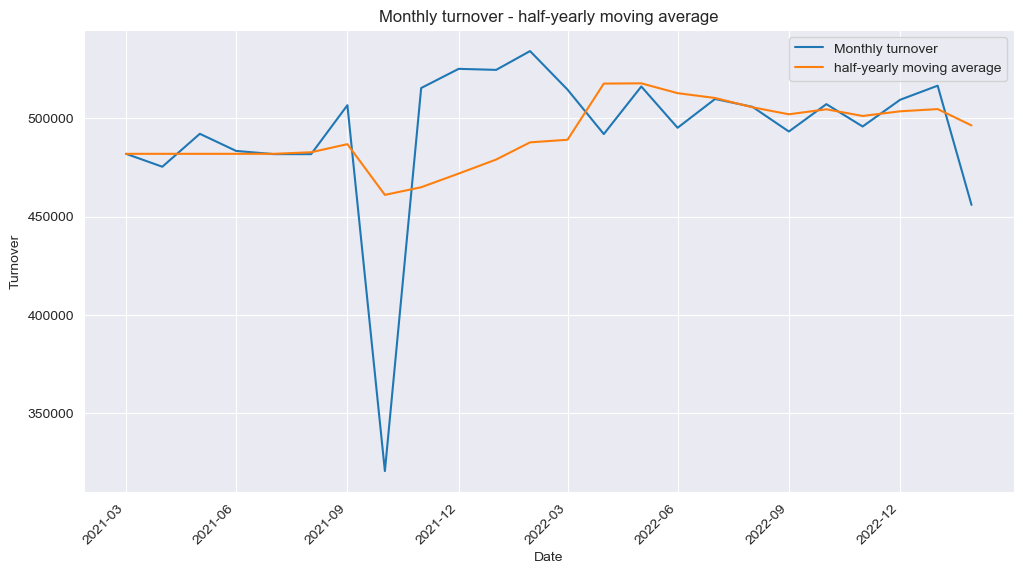

In [35]:
# Creation of a df with sales per month
tpc_journal = tpc.groupby(pd.Grouper(key='Date', freq='M'))['price'].sum().reset_index()

# Creation of a column to calculate the moving average of sales over a 6-month period
tpc_journal['CA_rolling'] = tpc_journal['price'].rolling(window=6).mean().fillna(tpc_journal['price'].iloc[0])

# Creation of the subplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(12, 6))

# Creation of curves
ax.plot(tpc_journal['Date'], tpc_journal['price'], label='Monthly turnover')
ax.plot(tpc_journal['Date'], tpc_journal['CA_rolling'], label='half-yearly moving average')

# Modification of the x-axis
dates = pd.date_range(start=tpc_journal['Date'].min(), end=tpc_journal['Date'].max(), freq='3M')
ax.set_xticks(dates)
ax.set_xticklabels([d.strftime('%Y-%m') for d in dates], rotation=45, ha='right')

# Modification of the y-axis
plt.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Turnover')

# Chart title
ax.set_title('Monthly turnover - half-yearly moving average')

ax.legend()
plt.show()

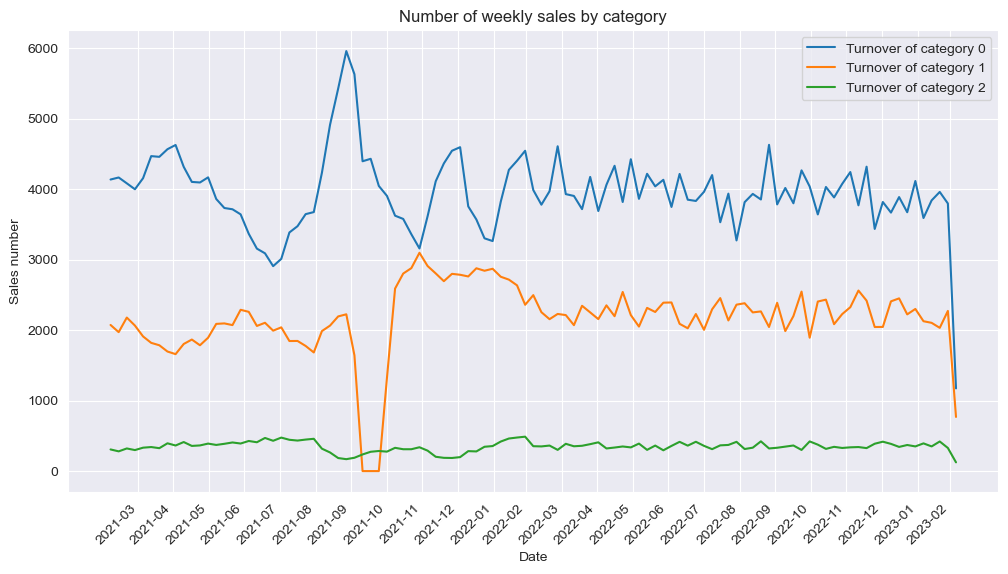

In [36]:
# Creation of the subplot
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(12, 6))

# Creation of curves by category
for i in range(3):
    cat = tpc[tpc['categ'] == i].groupby(pd.Grouper(key='Date', freq='W'))['session_id'].count().reset_index()
    ax.plot(cat['Date'], cat['session_id'], label=f'Turnover of category {i}')

# Modification of the x-axis
dates = pd.date_range(start=tpc['Date'].min(), end=tpc['Date'].max(), freq='M')
ax.set_xticks(dates)
ax.set_xticklabels([d.strftime('%Y-%m') for d in dates], rotation=45, ha='right')

# Modification of the y-axis
plt.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Sales number')

# Graph titles
ax.set_title('Number of weekly sales by category')

# Legend
ax.legend()

plt.show()

**We notice something abnormal in October 2021, no sales for category**

In [37]:
# Category 1 products for the month
oct = tpc.loc[(tpc['Date'] >= '2021-10-01') & (tpc['Date'] <= '2021-10-31') & (tpc['categ'] == '1')]
oct

,id_prod,session_id,client_id,Date,price,categ,sex,birth,Âge,_merge


After checking, we have come to the conclusion that it's a bug. We are leaving the situation as it is, as no data is visible in the dataframe, so this has very little impact on the next part.

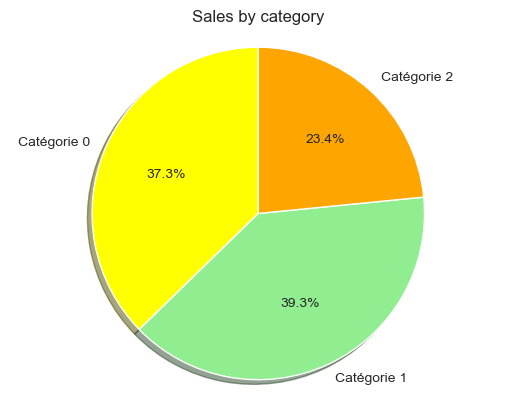

In [38]:
# Creation of a df with the price sum by category
cat_sum = tpc.groupby('categ')['price'].sum()

# Definition of labels and colors
labels = ['Catégorie ' + str(i) for i in cat_sum.index]
colors = ['yellow', 'lightgreen', 'orange']

# Creationof the graph
plt.pie(cat_sum, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sales by category')
plt.axis('equal')

plt.show()

We can see here that category 1 is more important in terms of sales than category 0. However, we saw in the previous graph that category 0 sold more than category 1. We can check later if there is a correlation between product category and selling price

## Average transaction amount<a class="anchor" id="section2_2"></a>

In [39]:
# Create a loop to calculate the average basket per session for each year
years = ['2021', '2022']
for year in years:
    panier = tpc.loc[tpc['Date'].dt.year == int(year)]
    panier_moyen = round(panier.groupby('session_id')['price'].sum().mean(), 2)
    
print(f"Average basket for {year}: {panier_moyen}")

Average basket for 2022: 34.94


## Retention<a class="anchor" id="section2_3"></a>

In [40]:
# Create de df with the expenses sum per client
panier_moyen_client = tpc.groupby('client_id')['price'].sum().reset_index()

# The biggest buyers ranking
panier_moyen_client.sort_values(['price'], ascending=False).head(10)

,client_id,price
677,c_1609,323678.54
4388,c_4958,288600.82
6337,c_6714,153370.60
2724,c_3454,113637.93
2513,c_3263,5276.87
634,c_1570,5271.62
2108,c_2899,5214.05
1268,c_2140,5208.82
7006,c_7319,5155.77
7715,c_7959,5085.45


**Here we can see that four customers stand out from the rest, and from the results we can conclude that these are four professional customers, so the bookshop does both BtoC and BtoB business.**

In [41]:
# The lowest buyers ranking
panier_moyen_client.sort_values(['price'], ascending=True).head(10)

,client_id,price
8151,c_8351,6.31
7918,c_8140,8.30
7889,c_8114,9.98
1556,c_240,11.06
4044,c_4648,11.20
3855,c_4478,13.36
5501,c_5962,13.99
5589,c_6040,15.72
5453,c_5919,15.98
5354,c_5829,16.07


# Breakdown by gender and age<a class="anchor" id="chapitre3"></a>

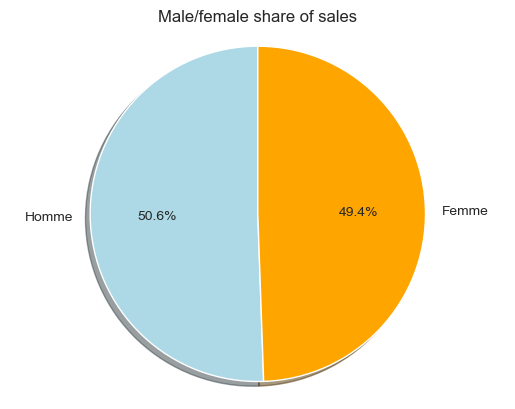

In [42]:
# Create two variables to group men and women
sex_m = (tpc[tpc['sex'] == 'm'].groupby(['sex'])['price'].sum())/ca
sex_f = (tpc[tpc['sex'] == 'f'].groupby(['sex'])['price'].sum())/ca

# Create graph
labels = ['Homme', 'Femme']
sizes = [sex_m, sex_f]
colors = ['lightblue', 'orange']
explode = (0, 0)

fig, ax = plt.subplots()
ax.pie([float(s) for s in sizes], explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.title('Male/female share of sales')

plt.show()

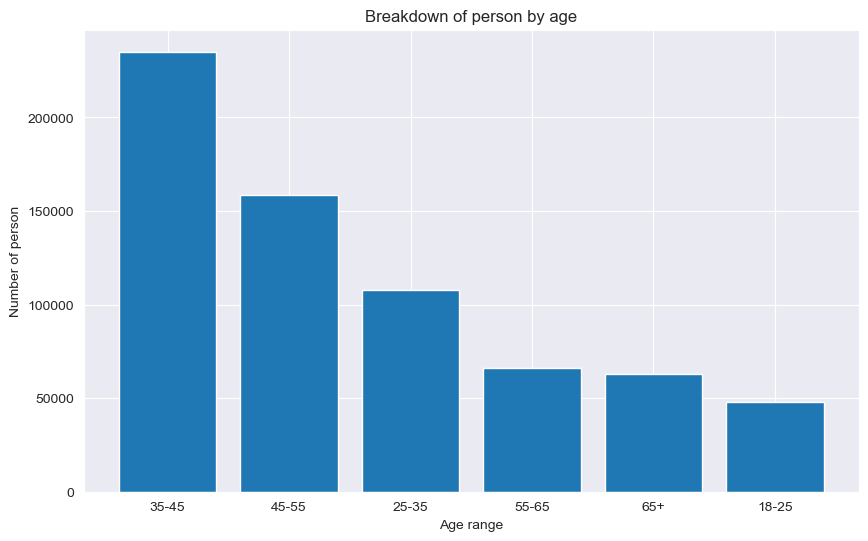

In [43]:
# Create groups with age ranges
age_groups = pd.cut(tpc['Âge'], bins=[18, 25, 35, 45, 55, 65, np.inf], labels=['18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Count the number of rows per ranges
age_count = pd.value_counts(age_groups)

# Create graph
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(age_count.index, age_count.values)

# Definition of titles and axes
plt.grid(True)
ax.set_xlabel('Age range')
ax.set_ylabel('Number of person')
ax.set_title('Breakdown of person by age')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()

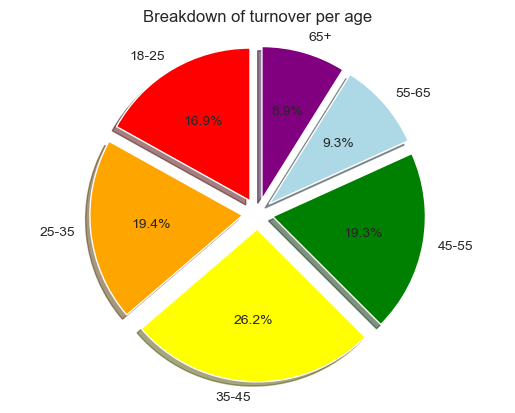

In [44]:
# Create groups with age ranges
age_groups = pd.cut(tpc['Âge'], bins=[18, 25, 35, 45, 55, 65, np.inf], labels=['18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Sum of purchase per age range
age_ca = tpc.groupby(age_groups)['price'].sum()

# Create graph
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65+']
sizes = [age_ca[a] for a in labels]
colors = ['red', 'orange', 'yellow', 'green', 'lightblue', 'purple']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.title('Breakdown of turnover per age')

plt.show()

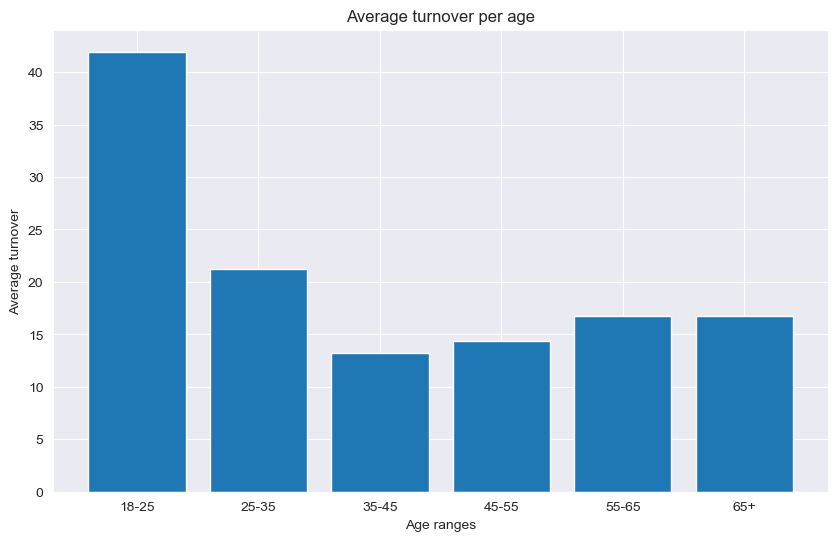

In [45]:
# Create groups with age ranges
groupage = pd.cut(tpc['Âge'], bins=[18, 25, 35, 45, 55, 65, np.inf], labels=['18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Calculate the average price per age range
camoyen = tpc.groupby(groupage)['price'].mean()

# Create graph
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(camoyen.index, camoyen.values)

plt.grid(True)
ax.set_xlabel('Age ranges')
ax.set_ylabel('Average turnover')
ax.set_title('Average turnover per age')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.show()

We can see that the 18-25 age group spends the most. On the other hand, it's the 35-45 age group that accounts for the largest share of the company's turnover, because there are more of them.
Let's now look at the distribution of consumption.

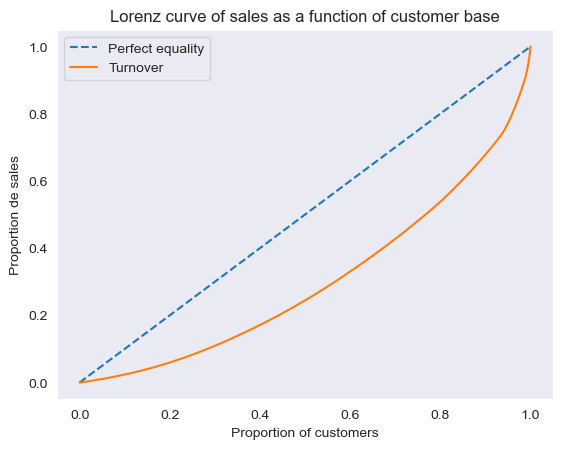

In [46]:
# Calculate the Lorenz curve
ca = tpc[tpc['price'] > 0]
cv = ca['price'].values
n = len(ca)
lorenz = np.cumsum(np.sort(cv)) / cv.sum()
lorenz = np.append([0],lorenz)

# Create the curve
plt.plot([0,1], [0,1], linestyle='--', label='Perfect equality')
plt.legend()

xaxis = np.linspace(0,1,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Turnover')
plt.legend()
plt.title('Lorenz curve of sales as a function of customer base')
plt.xlabel('Proportion of customers')
plt.ylabel('Proportion de sales')
plt.show()

In [47]:
# Surface under the Lorenz curve. The first segment (lorenz[0]) is half below 0, so we cut it in 2. We do the same for the last segment, lorenz[-1], which is half above 1.
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n

# Area between the first bisector and the Lorenz curve
S = 0.5 - AUC
gini = 2*S
gini

0.39542557287837055

**A Gini index of 0.3 suggests a relatively equitable distribution of purchases between customers. This means that the company attracts a wide range of customers with different incomes. In general, a Gini index of less than 0.4 is considered to indicate a relatively equitable distribution**.

# Dataset for correlation analysis<a class="anchor" id="chapitre4"></a>

In [48]:
# Creation of a grouped df by customer
tpc_client = tpc.groupby('client_id').agg({'Âge': 'first','sex': 'first', 'session_id': 'count', 'price': ['sum', 'mean']})

# Add a new column for calculating purchase frequency
tpc_client['freq'] = tpc_client['session_id'] / tpc['Date'].dt.month.nunique()

# Columns names
tpc_client = tpc_client.set_axis(['Âge', 'genre', 'nbr de sessions', 'panier total', 'panier moyen', 'frequence'], axis=1)

tpc_client.head()

,Âge,genre,nbr de sessions,panier total,panier moyen,frequence
client_id,,,,,,
c_1,68,m,39,558.18,14.312308,3.250000
c_10,67,m,58,1353.60,23.337931,4.833333
c_100,31,m,8,254.85,31.856250,0.666667
c_1000,57,f,125,2261.89,18.095120,10.416667
c_1001,41,m,102,1812.86,17.773137,8.500000


In [49]:
# Decreasing order of purchase frequency by customer
tpc_client.sort_values(['frequence'], ascending = False).head()

,Âge,genre,nbr de sessions,panier total,panier moyen,frequence
client_id,,,,,,
c_1609,43,m,25465,323678.54,12.710722,2122.083333
c_6714,55,f,9169,153370.60,16.727080,764.083333
c_3454,54,m,6770,113637.93,16.785514,564.166667
c_4958,24,m,5183,288600.82,55.682196,431.916667
c_3263,38,f,403,5276.87,13.093970,33.583333


In [50]:
# Filtering of the df with frequencies above than 100 per month
tpc_client = tpc_client.loc[tpc_client['frequence']<100].reset_index()

# Decreasing ranking of the 'panier total' variable
tpc_client.sort_values(['panier total'], ascending = False).head()

,client_id,Âge,genre,nbr de sessions,panier total,panier moyen,frequence
2512,c_3263,38,f,403,5276.87,13.093970,33.583333
634,c_1570,44,f,369,5271.62,14.286233,30.750000
2107,c_2899,29,f,105,5214.05,49.657619,8.750000
1267,c_2140,46,f,402,5208.82,12.957264,33.500000
7002,c_7319,49,f,371,5155.77,13.896954,30.916667


In [51]:
# Creation of a df grouped by customer session
tpc_session = tpc.groupby('session_id').agg({'id_prod': 'first', 'categ': 'first', 'sex': 'first', 'Âge': 'first', 'price': 'first'}).reset_index()

# Decreasing ranking of purchase price per session
tpc_session.sort_values(['price'], ascending=False).head(20)

,session_id,id_prod,categ,sex,Âge,price
284353,s_47558,2_2,2,m,24,300.00
281609,s_45088,2_2,2,f,26,300.00
164765,s_252144,2_2,2,m,24,300.00
31169,s_130658,2_2,2,m,24,300.00
226274,s_308301,2_2,2,m,24,300.00
14684,s_11582,2_2,2,m,24,300.00
129722,s_220074,2_2,2,m,24,300.00
162020,s_249625,2_2,2,m,24,300.00
226092,s_308128,2_2,2,f,26,300.00
34688,s_133825,2_76,2,f,19,254.44


# Correlations<a class="anchor" id="chapitre5"></a>

## Correlation between genre and book categories<a class="anchor" id="section5_1"></a>

In [52]:
# Creation of a table grouping the number of sessions by gender and by category
tableau_contingence = pd.crosstab(tpc_session['sex'], tpc_session['categ'])
tableau_contingence

categ,0,1,2
sex,,,
f,89409,68500,11523
m,91082,68753,13008


In [53]:
# Correlation test chi2
stat, p_value, dof, expected = chi2_contingency(tableau_contingence)

# Probability limit 5%
alpha = 0.05

print("Null hypothesis: There is no correlation between gender and categories purchased")
print("Alternative hypothesis: There is a correlation between gender and categories purchased")
print("Value of the test statistic : ", stat)
print("p-value : ", p_value)
if p_value < alpha:
    print("The null hypothesis is rejected at the significance level of", alpha)
else:
    print("The null hypothesis cannot be rejected at the significance level of", alpha)

Null hypothesis: There is no correlation between gender and categories purchased
Alternative hypothesis: There is a correlation between gender and categories purchased
Value of the test statistic :  71.8833369437302
p-value :  2.458848168336554e-16
The null hypothesis is rejected at the significance level of 0.05


## Correlation between price and product category<a class="anchor" id="section5_2"></a>

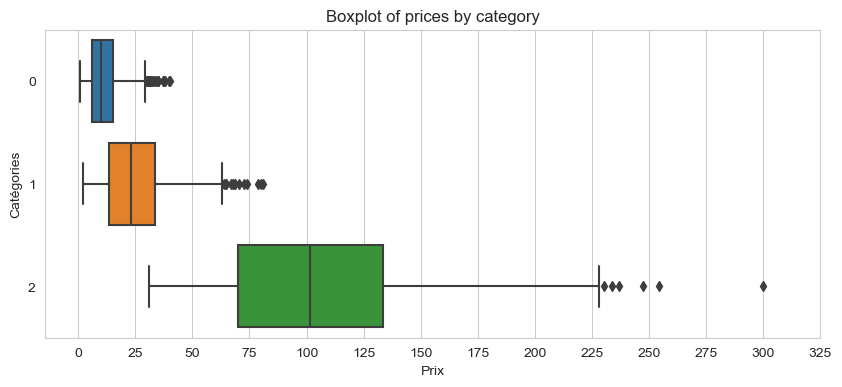

In [54]:
# Creation of a variable grouping products by category and average price
corrprixcateg = tpc_session.groupby('id_prod').agg({'categ': 'first', 'price': 'mean'})
sns.set_style("whitegrid")

# Create boxplot
sns.boxplot(x='price', y='categ', data=corrprixcateg, orient='horizontal')

# Definition of axes
plt.xlabel('Prix')
plt.ylabel('Catégories')
plt.title('Boxplot of prices by category')
plt.xticks(np.arange(0, 350, 25))
fig = plt.gcf()
fig.set_size_inches(10, 4)

plt.show()

In [55]:
# Shapiro normality test for the price variable
stat, p = shapiro(corrprixcateg['price'])

# Probability limit 5%
alpha = 0.05

if p > alpha:
    print('La distribution est gaussienne (fail to reject H0)')
else:
    print('La distribution n\'est pas gaussienne (reject H0)')

La distribution n'est pas gaussienne (reject H0)


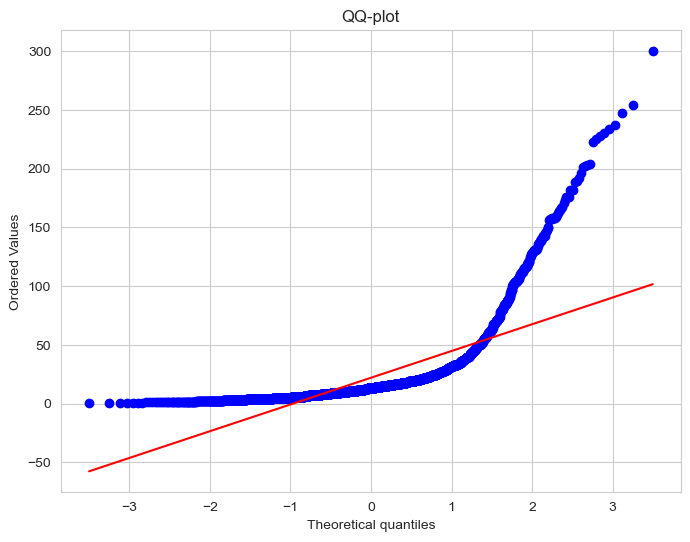

In [56]:
# Create price variable in 'corrprixcateg' df
prix = corrprixcateg['price']

# Create the QQ-plot
fig, ax = plt.subplots(figsize=(8,6))
stats.probplot(prix, dist="norm", plot=ax)
ax.set_title("QQ-plot")
plt.show()

In [57]:
# ANOVA statistical test between price and category
stat, p = stats.f_oneway(corrprixcateg['price'], corrprixcateg['categ'])

print("Corrélation :", stat)
print("p-value : ", p)

# Probability limit 5%
if p < 0.05:
    print("There is a significant difference between at least two of the groups.")
else:
    print("There is no significant difference between the groups.")

Corrélation : 1505.1836420423654
p-value :  2.3465639702124017e-293
There is a significant difference between at least two of the groups.


In [58]:
# Creation of a list by category with all the prizes per category
groups = corrprixcateg.groupby('categ')['price'].apply(list)

# Kruskal-Wallis statistical test
stat, p = kruskal(*groups)

print("Statistique de test : ", stat)
print("p-value : ", p)

# Probability limit 5%
if p < 0.05:
    print("There is a significant difference between at least two of the groups.")
else:
    print("There is no significant difference between the groups.")

Statistique de test :  1106.9774373214125
p-value :  4.196659076878545e-241
There is a significant difference between at least two of the groups.


## Correlation between Age and Total Purchase Amount<a class="anchor" id="section5_3"></a>

In [59]:
# Create a function for each column, test for normality using the Shapiro-Wilk test
def test_normality(df, *cols, alpha=0.05):
    for col in cols:
        
# Calculate the test statistic and the p-value
        stat, p = shapiro(df[col])
        print(f'Test statistic for {col}: {stat:.3f}, p-valeur: {p:.3f}')
        if p > alpha:
            print(f'The distribution of {col} is Gaussian (fail to reject H0)')
        else:
            print(f'The distribution of {col} is not Gaussian (reject H0)')
            
# For each column, create a QQ-plot to visualise normality
    for col in cols:
        qplot = df[col]
        fig, ax = plt.subplots(figsize=(8,6))
        stats.probplot(qplot, dist="norm", plot=ax)
        ax.set_title("QQ-plot " + col)
        plt.show()

Test statistic for Âge: 0.970, p-valeur: 0.000
The distribution of Âge is not Gaussian (reject H0)
Test statistic for panier total: 0.904, p-valeur: 0.000
The distribution of panier total is not Gaussian (reject H0)


/Users/antoinebergounhe/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


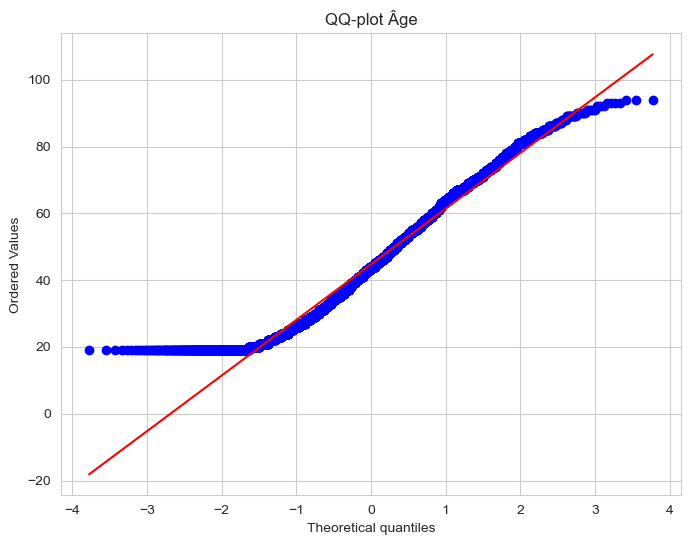

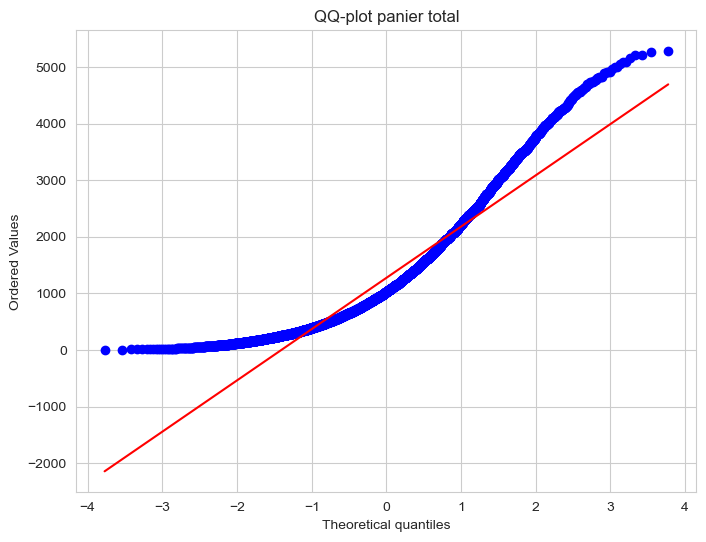

In [60]:
# Normality test for the 'Age' and 'Total basket' variables
test_normality(tpc_client, 'Âge', 'panier total')

In [61]:
# Spearman correlation test
correlation, p_value = spearmanr(tpc_client['Âge'], tpc_client['panier total'])

# Probability limit 5%
alpha = 0.05
print("Null hypothesis: There is no correlation between gender and categories purchased")
print("Alternative hypothesis: There is a correlation between gender and categories purchased")
print("Spearman correlation :", correlation)
print("p-value : ", p_value)

if p_value < alpha:
    print("The null hypothesis is rejected at the significance level of", alpha)
else:
    print("The null hypothesis cannot be rejected at the significance level of", alpha)

Null hypothesis: There is no correlation between gender and categories purchased
Alternative hypothesis: There is a correlation between gender and categories purchased
Spearman correlation : -0.18496031632481857
p-value :  5.0898053041103164e-67
The null hypothesis is rejected at the significance level of 0.05


In [62]:
# Pearson correlation test
corr, p_value = pearsonr(tpc_client['Âge'], tpc_client['panier total'])

print("Pearson coefficient correlation : ", corr)
print("P-value : ", p_value)

Pearson coefficient correlation :  -0.18812059759642713
P-value :  2.628929402933582e-69


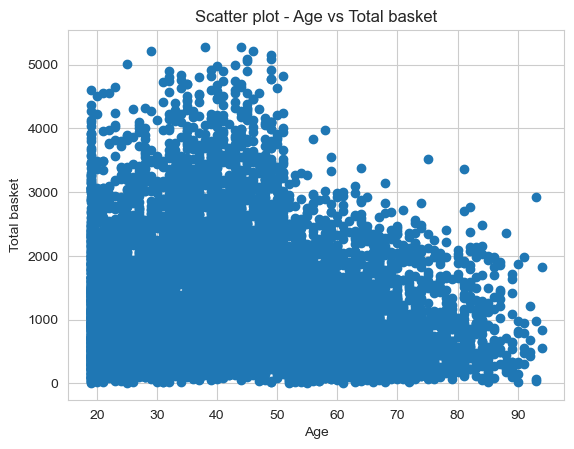

In [63]:
x = tpc_client['Âge']
y = tpc_client['panier total']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Total basket')
plt.title('Scatter plot - Age vs Total basket')
plt.show()

## Correlation between age and frequency of purchase<a class="anchor" id="section5_4"></a>

Test statistic for frequence: 0.815, p-valeur: 0.000
The distribution of frequence is not Gaussian (reject H0)


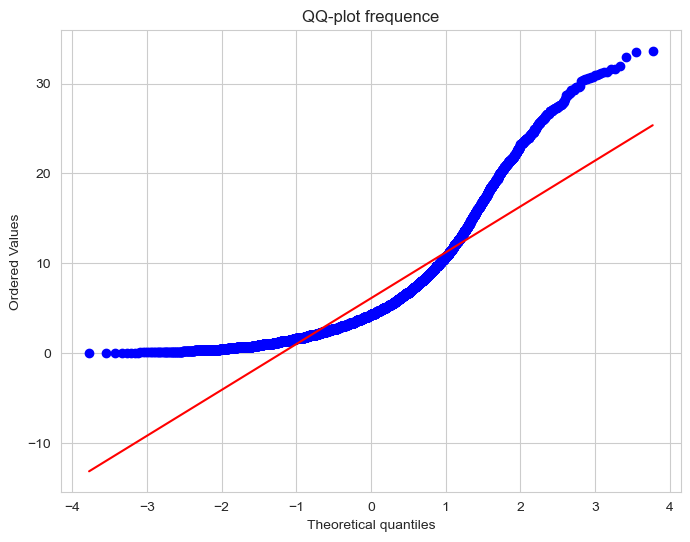

In [64]:
# Normality test for the 'frequency' variable
test_normality(tpc_client, 'frequence')

Text(0.5, 1.0, 'Histogram of frequency')

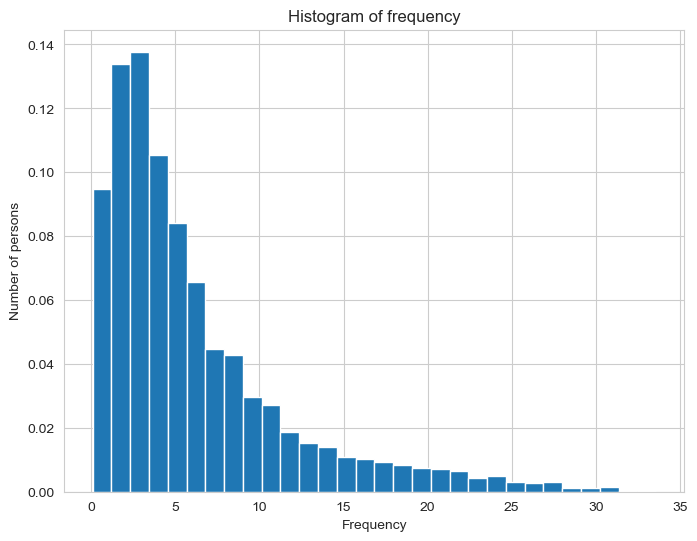

In [65]:
# Isolation of the frequence column
freq = tpc_client['frequence']

# Create the histogramme
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(freq, bins=30, density=True)

plt.xlabel('Frequency')
plt.ylabel('Number of persons')
plt.title('Histogram of frequency')

Text(0.5, 1.0, 'Histogram of frequency')

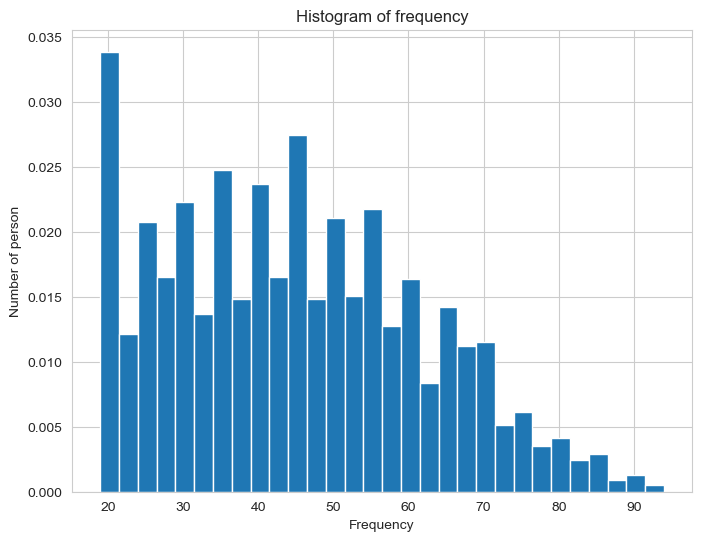

In [66]:
# Isolating the 'Age' column in an age variable
age = tpc_client['Âge']

# Create the histogramme
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(age, bins=30, density=True)

plt.xlabel('Frequency')
plt.ylabel('Number of person')
plt.title('Histogram of frequency')

In [67]:
# Spearman correlation test
correlation, p_value = spearmanr(tpc_client['Âge'], tpc_client['frequence'])

# Probability limit 5%
alpha = 0.05
print("Null hypothesis: There is no correlation between gender and categories purchased")
print("Alternative hypothesis: There is a correlation between gender and categories purchased")
print("Spearman correlation :", correlation)
print("p-value : ", p_value)

if p_value < alpha:
    print("The null hypothesis is rejected at the significance level of", alpha)
else:
    print("The null hypothesis cannot be rejected at the significance level of", alpha)

Null hypothesis: There is no correlation between gender and categories purchased
Alternative hypothesis: There is a correlation between gender and categories purchased
Spearman correlation : 0.1286165492263736
p-value :  4.9421497984061076e-33
The null hypothesis is rejected at the significance level of 0.05


In [68]:
# Pearson correlation test
corr, p_value = pearsonr(tpc_client['Âge'], tpc_client['frequence'])

print("Pearson coefficient correlation : ", corr)
print("P-value : ", p_value)

Pearson coefficient correlation :  0.030607553687411363
P-value :  0.004539437145019213


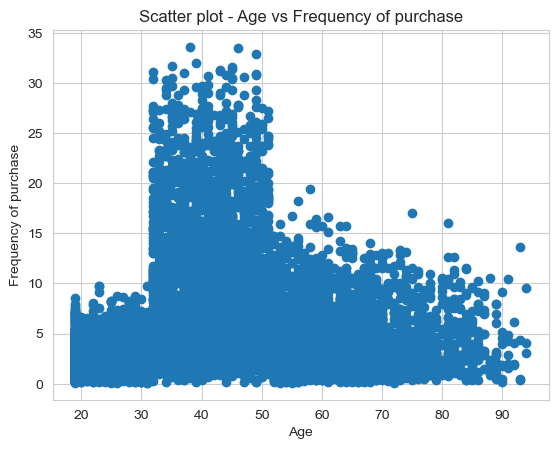

In [69]:
x = tpc_client['Âge']
y = tpc_client['frequence']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Frequency of purchase')
plt.title('Scatter plot - Age vs Frequency of purchase')
plt.show()

## Correlation between age and average basket size<a class="anchor" id="section5_5"></a>

Test statistic for panier moyen: 0.686, p-valeur: 0.000
The distribution of panier moyen is not Gaussian (reject H0)


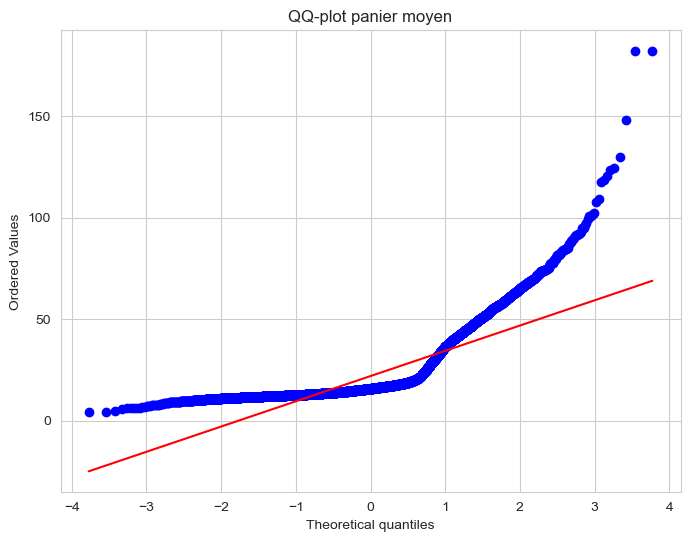

In [70]:
# Test de normalité de la variable 'panier moyen'
test_normality(tpc_client, 'panier moyen')

In [71]:
# Spearman correlation test
corr, p_value = spearmanr(tpc_client['Âge'], tpc_client['panier moyen'])

# Probability limit 5%
alpha = 0.05
print("Null hypothesis: There is no correlation between gender and categories purchased")
print("Alternative hypothesis: There is a correlation between gender and categories purchased")
print("Spearman correlation :", corr)
print("p-value : ", p_value)

if p_value < alpha:
    print("The null hypothesis is rejected at the significance level of", alpha)
else:
    print("The null hypothesis cannot be rejected at the significance level of", alpha)

Null hypothesis: There is no correlation between gender and categories purchased
Alternative hypothesis: There is a correlation between gender and categories purchased
Spearman correlation : -0.32626746944277774
p-value :  2.385649439604205e-212
The null hypothesis is rejected at the significance level of 0.05


In [72]:
# Pearson correlation test
corr, p_value = pearsonr(tpc_client['Âge'], tpc_client['panier moyen'])

# Probability limit 5%
alpha = 0.05
print("Pearson correlation :", correlation)
print("p-value : ", p_value)

Pearson correlation : 0.1286165492263736
p-value :  0.0


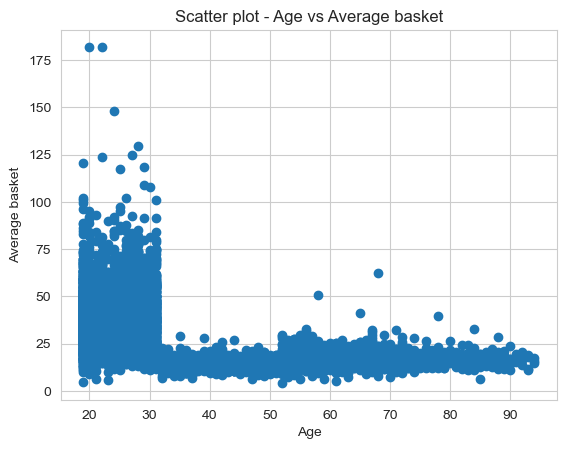

In [73]:
x = tpc_client['Âge']
y = tpc_client['panier moyen']

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Average basket')
plt.title('Scatter plot - Age vs Average basket')
plt.show()

## Correlation between age and book categories<a class="anchor" id="section5_6"></a>

In [74]:
# ANOVA statistic test
stat, p = stats.f_oneway(tpc_session['Âge'], tpc_session['categ'])

print("Correlation :", correlation)
print("p-value : ", p_value)

# Probability limit 5%
if p < 0.05:
    print("There is a significant difference between at least two of the groups.")
else:
    print("There is no significant difference between the groups.")

Correlation : 0.1286165492263736
p-value :  0.0
There is a significant difference between at least two of the groups.


In [75]:
# Kruskal-Wallis statistic test
stat, p = stats.kruskal(tpc_session['Âge'], tpc_session['categ'])

print("Correlation :", correlation)
print("p-value : ", p_value)

# Probability limit 5%
if p < 0.05:
    print("There is a significant difference between at least two of the groups.")
else:
    print("There is no significant difference between the groups.")

Correlation : 0.1286165492263736
p-value :  0.0
There is a significant difference between at least two of the groups.


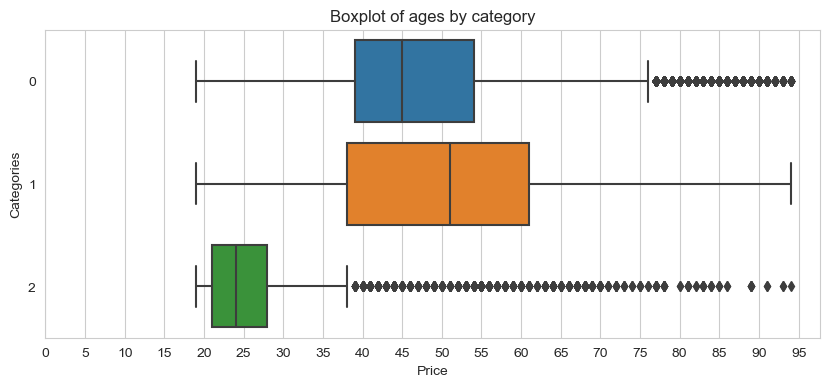

In [77]:
# Creation of a variable grouping products by category and average price
age = tpc_session['Âge']
categ = tpc_session['categ']
sns.set_style("whitegrid")

# Create the graph
sns.boxplot(x='Âge', y='categ', data=tpc_session, orient='horizontal')

# Définition of axes
plt.xlabel('Price')
plt.ylabel('Categories')
plt.title('Boxplot of ages by category')
plt.xticks(np.arange(0, 100, 5))
fig = plt.gcf()
fig.set_size_inches(10, 4)

plt.show()